In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from time import time

In [2]:
pd.set_option('mode.chained_assignment', None)

In [3]:
Ip3=pd.read_csv("D:\SHOBHIT_MANIAR_387777\lp33.csv") 
dfnew3=Ip3[["Unnamed: 1","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6"]].copy()

In [4]:
df3=dfnew3.dropna()

In [5]:
df3["F_vec"]=np.sqrt((df3["Unnamed: 1"]**2+df3["Unnamed: 2"]**2+df3["Unnamed: 3"]**2))
df3["T_vec"]=np.sqrt((df3["Unnamed: 4"]**2+df3["Unnamed: 5"]**2+df3["Unnamed: 6"]**2))
df33=Ip3["dummy"]

df3=df3.reset_index(drop=True)
df3=df3.groupby(np.arange(len(df3))//15).mean()

In [6]:
df31=df33.dropna().reset_index(drop=True)
df3["Classes"]=df31
df3main=df3[["Classes","F_vec","T_vec"]].copy()


ok                20
moved             15
slightly_moved     9
lost               3
Name: Classes, dtype: int64


array([[<AxesSubplot:title={'center':'lost'}>,
        <AxesSubplot:title={'center':'moved'}>],
       [<AxesSubplot:title={'center':'ok'}>,
        <AxesSubplot:title={'center':'slightly_moved'}>]], dtype=object)

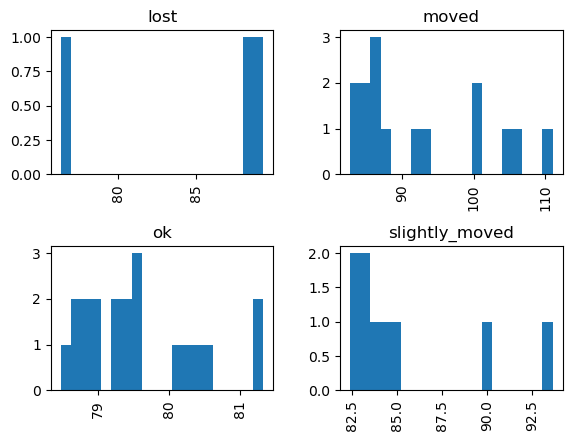

In [7]:
print(df3main['Classes'].value_counts())
df3main.hist(column='F_vec', bins=20, by='Classes')

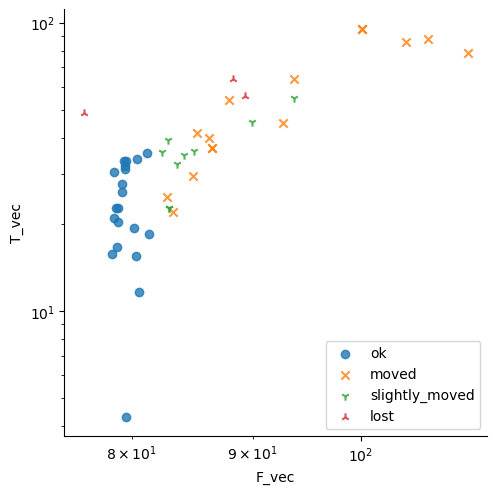

In [8]:
import seaborn as sns
grid=sns.lmplot( x="F_vec", y="T_vec", data=df3main, fit_reg=False, hue="Classes", legend=False, markers=["o", "x", "1","2"])
plt.legend(loc='lower right')
grid.set(xscale="log", yscale="log")
plt.show()

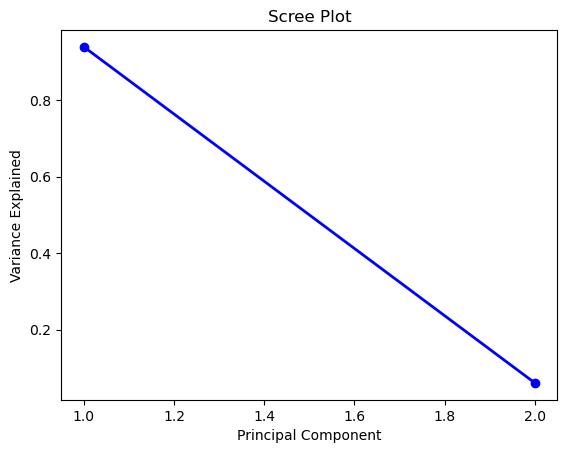

In [9]:
df3_pca=df3main.iloc[:,1:3]
scaler = StandardScaler()
df3_pca=pd.DataFrame(scaler.fit_transform(df3_pca))
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df3_pca)
pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
#print(pca.explained_variance_ratio_)

In [10]:
data_fin = pd.DataFrame( columns = [ 'pca1','class'])
data_fin['pca1'] = pca_df['PC1']
data_fin['class'] = df3["Classes"]

In [11]:
from sklearn import preprocessing
e=preprocessing.LabelEncoder()
Y=e.fit_transform(df3main.Classes)
X=df3main.iloc[:,1:3].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
ann = tf.keras.models.Sequential()

In [13]:
keras = tf.keras
ann.add(tf.keras.layers.Dense(units=100,activation=keras.layers.LeakyReLU(alpha=0.01)))

In [14]:
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))

In [15]:
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))

In [16]:
ann.add(tf.keras.layers.Dense(units=4,activation="softmax"))

In [17]:
ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [18]:
start = time()
ann.fit(X_train,Y_train,batch_size=10,epochs = 150)
print(time()-start)

Epoch 1/150
5/5 [==============================] - 2s 6ms/step - loss: 1.4246 - accuracy: 0.2619
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 1.2857 - accuracy: 0.6667
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 1.1994 - accuracy: 0.6905
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 1.1113 - accuracy: 0.6905
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 1.0091 - accuracy: 0.6905
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.9302 - accuracy: 0.6905
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 0.8669 - accuracy: 0.6905
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.6905
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.6905
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7938 - accuracy: 0.6905
Epoch 11/150
5/5 [===========

In [19]:
y_pred=ann.predict(X_test)
a=np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 89ms/step


In [20]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,a)
print(accuracy)

0.8


<AxesSubplot:>

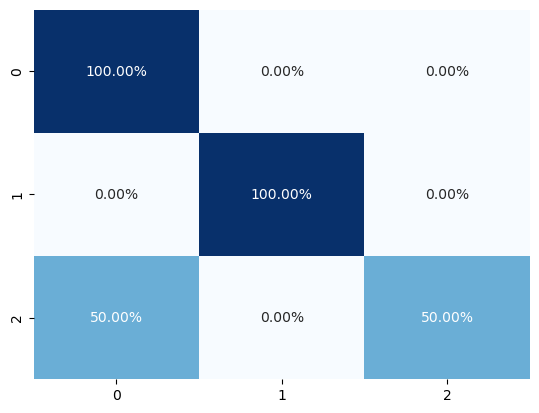

In [49]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, a)
#plot_confusion_matrix(cm=cf_matrix, title='Confusion Matrix')

sns.heatmap((cf_matrix.T/cf_matrix.sum(axis=1)).T, annot=True, fmt='.2%', cmap='Blues', cbar=False)